# Comandos Básicos com Keras

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import os

In [5]:
!wget https://geographical.co.uk/wp-content/uploads/panda1200-1.jpg

--2023-09-12 19:40:20--  https://geographical.co.uk/wp-content/uploads/panda1200-1.jpg
Resolving geographical.co.uk (geographical.co.uk)... 2606:4700:20::ac43:47b9, 2606:4700:20::681a:627, 2606:4700:20::681a:727, ...
Connecting to geographical.co.uk (geographical.co.uk)|2606:4700:20::ac43:47b9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96057 (94K) [image/jpeg]
Saving to: 'panda1200-1.jpg'

     0K .......... .......... .......... .......... .......... 53% 24,0M 0s
    50K .......... .......... .......... .......... ...       100% 24,5M=0,004s

2023-09-12 19:40:21 (24,2 MB/s) - 'panda1200-1.jpg' saved [96057/96057]



# Carregando Imagem

Img shape: (800, 1200)


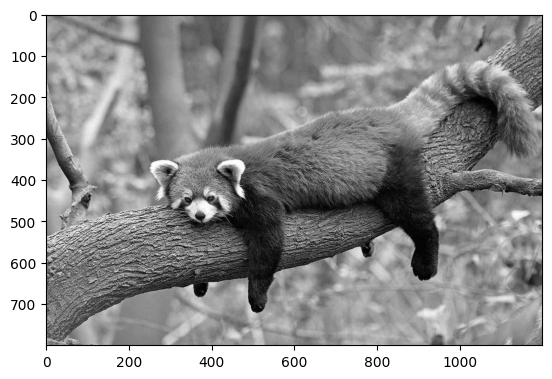

In [9]:
img = cv2.imread(r"C:\Users\Eliezer Junior\Git\MBA\3DTS-ReinforcementLearning\Aula2\panda1200-1.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

height, width = img.shape
print("Img shape:", img.shape)

# Keras Input

- O método Input no Keras é uma função usada para criar uma camada de entrada em um modelo de rede neural.
- É usado para especificar a forma e o tipo de dados esperados na camada de entrada.
- O método Input retorna um tensor do Keras, que pode ser usado como entrada para as camadas subsequentes do modelo.

In [10]:
input_layer = keras.Input(shape=(height, width))
print("Input layer shape:", input_layer.shape)

Input layer shape: (None, 800, 1200)


# Keras Dense

O método Dense do Keras é uma camada fundamental em redes neurais artificiais. É uma camada densamente conectada, também conhecida como camada totalmente conectada ou camada de alimentação direta. Essa camada é usada para conectar cada neurônio de entrada a cada neurônio de saída, formando um padrão de conexões densas.

A sintaxe básica para criar uma camada Dense é a seguinte:

```
from keras.layers import Dense

Dense(units=numero_de_neuronios)(input_shape=(tamanho_da_entrada,))
```

Principais parâmetros que podem ser usados na camada Dense:

* units: é o número de neurônios na camada. Define a dimensão da saída da camada. Quanto maior o número de unidades, mais complexa a representação que a camada pode aprender. Escolher um número adequado de unidades depende do problema e da complexidade dos dados.

* activation: é a função de ativação que será aplicada à saída da camada. A função de ativação determina se um neurônio será ativado ou não com base na entrada ponderada que recebe. Alguns exemplos comuns são a função sigmoidal ('sigmoid'), a função tangente hiperbólica ('tanh') e a função de ativação retificadora ('relu').

* input_shape: é o formato da entrada para a camada. Normalmente, você precisa especificar esse parâmetro apenas na primeira camada do modelo. Por exemplo, (tamanho_da_entrada,) indica que a entrada é um vetor unidimensional com o tamanho especificado.


In [11]:
import keras
from keras.layers import Dense

In [12]:
input_layer = keras.Input(shape=(height, width))
Layer_1 = Dense(64)(input_layer)

Layer_2 = Dense(32)(Layer_1)
output = Dense(2)(Layer_2)

In [13]:
Layer_1.shape

TensorShape([None, 800, 64])

In [14]:
Layer_2.shape

TensorShape([None, 800, 32])

# Sequential Model

O método Sequential é uma classe da biblioteca Keras que nos permite criar modelos de redes neurais sequenciais de forma simples e intuitiva. Ele é chamado de sequencial porque os neurônios são organizados em camadas, uma após a outra, formando uma sequência.

Características e vantagens do Sequential:

* Simplicidade: O Sequential oferece uma interface de alto nível, o que significa que podemos criar modelos de redes neurais sem a necessidade de escrever código complexo. Com apenas algumas linhas de código, podemos criar e treinar redes neurais poderosas.

* Fácil empilhamento de camadas: O Sequential permite que adicionemos camadas ao modelo sequencialmente. Podemos começar com uma camada de entrada, adicionar camadas ocultas e, finalmente, terminar com uma camada de saída.

* Compatibilidade com várias camadas: O Sequential suporta uma ampla variedade de camadas, como camadas densas (fully connected), convolucionais, de pooling, de dropout, de recorrência, entre outras. Podemos personalizar o modelo escolhendo e configurando as camadas adequadas para a tarefa em questão.

* Treinamento eficiente: O Sequential integra-se perfeitamente com as funcionalidades de treinamento do Keras. Podemos especificar a função de perda (loss function), o otimizador e as métricas de avaliação com apenas algumas linhas de código.

In [16]:
from keras import layers
import numpy as np
img = cv2.imread(r"C:\Users\Eliezer Junior\Git\MBA\3DTS-ReinforcementLearning\Aula2\panda1200-1.jpg", cv2.IMREAD_COLOR)


height, width, channels = img.shape
print("Height: {}, Width: {}, Channels: {}".format(height, width, channels))

model = keras.Sequential()
model.add(layers.Input(shape=(height, width, channels)))
model.add(layers.Dense(32))
model.add(layers.Dense(16))
model.add(layers.Dense(2))

Height: 800, Width: 1200, Channels: 3


In [17]:
preprocessed_img = np.array([img])
result = model(preprocessed_img)
print(result)

tf.Tensor(
[[[[-34.98057    -24.244947  ]
   [-34.98057    -24.244947  ]
   [-34.810352   -24.08018   ]
   ...
   [-42.18042    -22.591644  ]
   [-43.636242   -24.247746  ]
   [-45.680157   -26.10778   ]]

  [[-35.320995   -24.57449   ]
   [-35.15077    -24.40975   ]
   [-35.15077    -24.40975   ]
   ...
   [-41.85006    -23.927172  ]
   [-41.51596    -23.578737  ]
   [-40.752747   -23.111599  ]]

  [[-35.83161    -25.068836  ]
   [-35.83161    -25.068836  ]
   [-35.661392   -24.904047  ]
   ...
   [-40.33224    -24.775267  ]
   [-38.380455   -22.920118  ]
   [-36.172665   -20.876408  ]]

  ...

  [[-13.311012   -27.890865  ]
   [-13.651451   -28.220413  ]
   [-15.17984    -29.48768   ]
   ...
   [ -1.1424904  -16.50093   ]
   [  1.1520004  -15.0011215 ]
   [  2.0030365  -14.177234  ]]

  [[-14.332283   -28.879534  ]
   [-13.140831   -27.726068  ]
   [-13.225754   -28.317438  ]
   ...
   [ -1.4829254  -16.830486  ]
   [ -0.20963669 -16.31934   ]
   [  0.13076401 -15.989784  ]]

  [[-12

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 800, 1200, 32)     128       
                                                                 
 dense_4 (Dense)             (None, 800, 1200, 16)     528       
                                                                 
 dense_5 (Dense)             (None, 800, 1200, 2)      34        
                                                                 
Total params: 690 (2.70 KB)
Trainable params: 690 (2.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Summary:

Layer (type): Qual a camada e que tipo de camda
Output Shape: Formato da saída da camada, por exemplo, (None, 602, 768, 32)
Param #: No cálculo da camada Dense, cada neurônio na camada está conectado a todos os neurônios na camada anterior. Portanto, o número de parâmetros de saída é calculado da seguinte forma:

```Número de parâmetros de saída = (número de neurônios na camada anterior) * (número de neurônios na camada) + (número de neurônios na camada)```

No exemplo, a camada Dense_3 tem 128 parâmetros de saída. Isso significa que ela recebeu uma entrada de um número de neurônios da camada anterior e possui 128 neurônios em si.
É importante ressaltar que o número de parâmetros em uma camada Dense é determinado pela multiplicação do número de neurônios da camada anterior pelo número de neurônios da camada atual, adicionado ao número de neurônios da camada atual. A adição do número de neurônios é devido aos bias, que são parâmetros adicionais que ajudam a ajustar a função de ativação da camada.

# keras Conv2D

O método Conv2D do Keras é uma camada de convolução bidimensional, ou seja, é projetado para trabalhar com dados em duas dimensões, como imagens. Essa camada é comumente usada como bloco de construção principal em uma arquitetura de CNN.


Parâmetros principais:
Ao usar o método Conv2D, é importante definir alguns parâmetros-chave. Vamos explorá-los brevemente:

* Filters (filtros): Este parâmetro determina o número de filtros (ou kernels) a serem aplicados durante a convolução. Cada filtro detecta um recurso específico na imagem de entrada.

* Kernel Size (tamanho do kernel): Especifica o tamanho do filtro. Um valor típico é (3, 3), o que significa que o filtro terá uma janela de 3x3 pixels.

* Strides (passos): Determina o deslocamento do filtro enquanto percorre a imagem. Valores comuns são (1, 1) para mover-se um pixel de cada vez.

* Padding (preenchimento): Controla o preenchimento de zeros ao redor da imagem de entrada. Isso pode ajudar a manter o tamanho da saída igual ao tamanho da entrada.

* Activation (ativação): Define a função de ativação a ser aplicada após a convolução. Exemplos comuns incluem ReLU, sigmoid e tanh.

* Input Shape (forma de entrada): Especifica a forma dos dados de entrada, normalmente no formato (altura, largura, canais).

In [21]:
model = keras.Sequential()
model.add(layers.Conv2D(input_shape=(602, 768, 1), filters=64, kernel_size=(3, 3)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 600, 766, 64)      640       
                                                                 
Total params: 640 (2.50 KB)
Trainable params: 640 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Max Pooling

O Keras oferece duas camadas de pooling principais: Max Pooling e Average Pooling.

Max Pooling:

* O Max Pooling é a camada de pooling mais comumente usada.
* Ele divide a imagem em regiões retangulares e substitui cada região pelo valor máximo presente nessa região.
* Isso preserva as características mais proeminentes e descarta informações menos relevantes.
* A camada Max Pooling pode ser configurada com diferentes tamanhos de janela e saltos (strides), controlando a quantidade de redução de dimensionalidade.

Average Pooling:

* O Average Pooling é uma variante do pooling que substitui cada região pela média dos valores presentes nessa região.
* Diferentemente do Max Pooling, ele realiza uma média ponderada de todas as informações da região.
* O Average Pooling pode ser útil em algumas situações em que a preservação geral da informação é mais importante do que a identificação de características específicas.

Funções de ativação nas camadas de Pooling:

* As camadas de pooling não têm funções de ativação não lineares associadas, pois seu objetivo é reduzir a dimensionalidade, não introduzir não linearidade

In [22]:
img = cv2.imread(r"C:\Users\Eliezer Junior\Git\MBA\3DTS-ReinforcementLearning\Aula2\panda1200-1.jpg", cv2.IMREAD_GRAYSCALE)

height, width = img.shape
print("Img shape:", img.shape)


model = keras.Sequential()
model.add(layers.Conv2D(input_shape=(height, width, 1), filters=32, kernel_size=(3, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.summary()

Img shape: (800, 1200)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 798, 1198, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 399, 599, 32)      0         
 D)                                                              


                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Keras Feature Map

Img shape: (800, 1200)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 798, 1198, 32)     320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 88ms/step


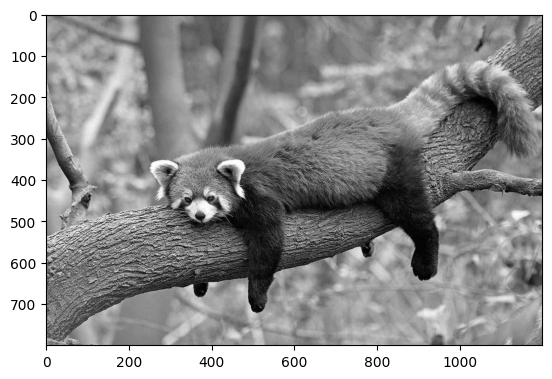

In [23]:
img = cv2.imread(r"C:\Users\Eliezer Junior\Git\MBA\3DTS-ReinforcementLearning\Aula2\panda1200-1.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

height, width = img.shape
print("Img shape:", img.shape)

model = keras.Sequential()
model.add(layers.Conv2D(input_shape=(height, width, 1), filters=32, kernel_size=(3, 3)))
model.summary()


feature_map = model.predict(np.array([img]))

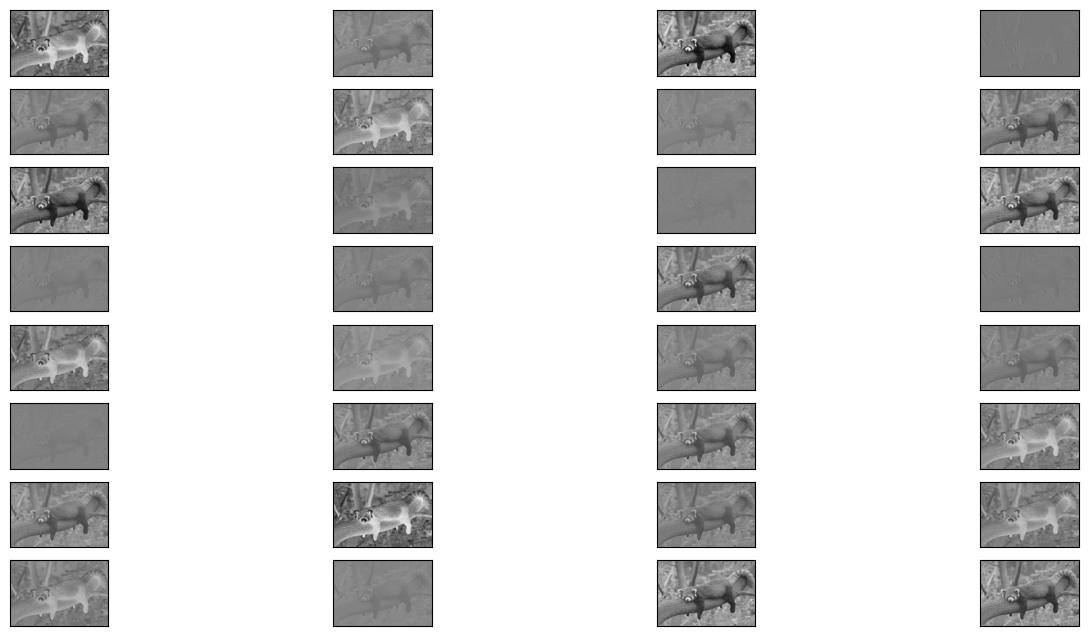

In [24]:
plt.figure(figsize=(16,8))

for i in range(32):
    feature_img = feature_map[0, :, :, i]
    ax = plt.subplot(8, 4, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_img, cmap="gray")
plt.show()

# Flatten Layer

O comando flatten no Keras é uma função que é usada para transformar uma matriz multidimensional em um vetor unidimensional. Isso é útil quando você precisa converter os dados de entrada em um formato adequado para alimentar uma camada densa (fully connected) em uma rede neural.



In [25]:
from keras.models import Sequential
from keras.layers import Flatten

img = cv2.imread(r"C:\Users\Eliezer Junior\Git\MBA\3DTS-ReinforcementLearning\Aula2\panda1200-1.jpg", cv2.IMREAD_GRAYSCALE)

height, width = img.shape
print("Img shape:", img.shape)

# Criando um modelo sequencial
model = Sequential()

# Adicionando uma camada flatten ao modelo
model.add(Flatten(input_shape=(height, width, 1)))

# Imprimindo a estrutura do modelo
model.summary()


Img shape: (800, 1200)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 960000)            0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
